<a href="https://colab.research.google.com/github/natanrajch/DiploDatos/blob/main/No_supervisado/ntb_clustering_2_fifa2019_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    
## Aprendizaje No Supervisado DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2021 dataset
 
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Clustering KM](#3.-Clustering-con-Kmeans)
4. [Clustering MS](#4.-Clustering-con-Mean-Shift)
5. [Clustering KM2](#5.-Clustering-con-Kmeans-sin-arqueros)
6. [Clustering MS2](#6.-Clustering-con-Mean-Shift-sin-arqueros)

## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [41]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [42]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [43]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

## 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [44]:
df=pd.read_csv("data.csv")

**Preparamos la base para Clustering:**

**Retiramos jugadores con bajo Desempeño global ("Overall")**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [45]:
n=10000
df_n=df.loc[:n] #los primeros n
df_n=df_n[(df_n['Overall']>70)] # mejores jugadores

skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

print(len(skills_ratings), 'variables numéricas: skills/habilidades')

df_skills=df_n[skills_ratings]

34 variables numéricas: skills/habilidades


# 3.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


In [46]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  11269853.111585528


**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

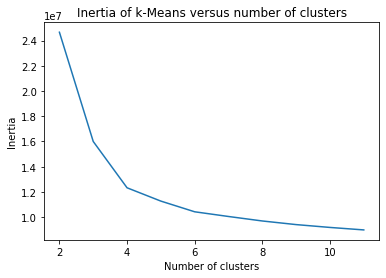

In [47]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

**Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [48]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]

In [49]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [50]:
#En Colab:
fig.show(renderer="colab")

In [51]:
#En Jupyter:
iplot(fig)
#plot(fig)

In [52]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


**EVALUACIÓN**

**EJERCICIO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans** 
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster
- Tabla de contingencia alguna categórica vs clusters
- Silohuette?


# 4.-Clustering-Mean-Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio/bandwith (de cobertura para cálculo de media). (Probar con varios)

In [53]:
ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 3


Se probó con varios valores de bandwith:
* 0.5 --> 4747 clusters
* 1 --> 4747 clusters
* 1.5 --> 1 cluster
* 2 --> 3 clusters
* 3 --> 1 cluster
* 4 --> Da error

Se mantiene entonces el valor de 2 para bandwith.

Graficamos los resultados:

In [54]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86

#Elijo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[14]

In [55]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [56]:
#En Colab
fig.show(renderer="colab")

In [57]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  5 clusters, nosotros lo forzamos
Mean shift encontró  3 clusters, según los hiperparámetros elegidos


**EVALUACIÓN**

**EJERCICIO EN GRUPO: Análisis exploratorio de los clusters, usando las clases asignadas por MeanShift** 

In [58]:
#Cantidad de observaciones por Cluster
fig, ax = plt.subplots(1,1, figsize=(8,5))
sns.countplot(df_clusters.MeanShift, ax=ax)
ax.set_title('Cantidad de observaciones por Cluster')


Text(0.5, 1.0, 'Cantidad de observaciones por Cluster')

In [59]:
for cluster in [0,1,2]:
  print('Análisis descriptivo de cluster #', cluster,':')
  print('    Conteo:', sum(df_clusters.MeanShift == cluster))
  print('    Edad promedio:', "%.2f" % df_clusters[df_clusters.MeanShift==cluster].Age.mean())
  print('    Principales Skills:')
  for skill, value in df_clusters[df_clusters.MeanShift==cluster].describe()[skills_ratings].loc['mean',:].sort_values(ascending=False)[:5].items():
    print('       ',skill,':', '%.2f' % value)


Análisis descriptivo de cluster # 0 :
    Conteo: 3433
    Edad promedio: 26.90
    Principales Skills:
        BallControl : 74.64
        Stamina : 74.24
        Agility : 74.00
        Acceleration : 73.49
        Dribbling : 73.21
Análisis descriptivo de cluster # 1 :
    Conteo: 881
    Edad promedio: 27.63
    Principales Skills:
        Strength : 80.29
        Aggression : 75.52
        StandingTackle : 74.28
        HeadingAccuracy : 73.53
        Interceptions : 72.58
Análisis descriptivo de cluster # 2 :
    Conteo: 435
    Edad promedio: 29.29
    Principales Skills:
        GKReflexes : 76.83
        GKDiving : 75.67
        GKPositioning : 74.27
        GKHandling : 72.63
        Reactions : 70.82


Analizando los datos, se puede observar que el algoritmo ha creado 3 grupos principales: 
* el Grupo 2 corresponde a ARQUEROS,
* el grupo 1 corresponde a DEFENSORES,
* el grupo 0 corresponde a LOS DEMÁS (y que obviamente, resultan los más numerosos)

In [60]:
# Tabla de contingencia alguna categórica vs clusters
data_crosstab = pd.crosstab(df_clusters['MeanShift'],
                            df_clusters['Preferred Foot'], 
                               margins = True)
print(data_crosstab)



Preferred Foot  Left  Right   All
MeanShift                        
0                915   2518  3433
1                177    704   881
2                 56    379   435
All             1148   3601  4749


Hay, proporcionalmente, muchos menos arqueros zurdos!
Quizás esto tenga que ver con que ser zurdo como arquero no implica tanta ventaja como sí lo implica como jugador

In [61]:
# Silhouette
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_skills, clusters2))

Silhouette Coefficient: 0.340


**Pregunta: normalizamos/estandarizamos la base?**

No tiene sentido normalizar, ya que los skills son variables que ya están todas en el mismo rango 0 a 100.

**Ahora vemos que agrupamientos se pueden hacer excluyendo los arqueros**

# 5.-Clustering-con-Kmeans-sin-arqueros

In [62]:
n=10000
df_n=df.loc[:n]
df_n=df_n[(df_n["Position"]!='GK')&(df_n['Overall']>69)]

skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

df_skills=df_n[skills_ratings]


In [63]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_

In [64]:
#data=[]
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[15]

In [65]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

In [66]:
#En Colab
fig.show(renderer="colab")

In [67]:
#en Jupyter:
plot(fig)

'temp-plot.html'

# 6.-Clustering-Mean-Shift-sin-arqueros 

In [68]:
ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_


labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Numero de clusters encontrado por Mean Shift : 13


In [69]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[14]
skill_2=skills_ratings[26]
print(skill_1,skill_2)

Balance Marking


Se eligen estos skills, que surgen del análisis realizado en el práctico 1, con el jointplot entre todas las variables.

In [70]:
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [71]:
#En Colab
fig.show(renderer="colab")

In [73]:
df_clusters=df_n
df_clusters['kmeansNOGK'] = km.labels_ #clusters
df_clusters['MeanShiftNOGK'] = ms.labels_ #clusters2

In [123]:
len(df_clusters[df_clusters.MeanShiftNOGK==cluster])

828

**Análisis exploratorio de las clases**

In [125]:
for cluster in range(13):
  print('Análisis descriptivo de cluster #', cluster,':')
  print('    Conteo:', sum(df_clusters.MeanShiftNOGK == cluster))
  print('    Edad promedio:', "%.2f" % df_clusters[df_clusters.MeanShiftNOGK==cluster].Age.mean())
  print('    Overall Promedio:', "%.2f" % df_clusters[df_clusters.MeanShiftNOGK==cluster].Overall.mean())
  pos1 = df_clusters[df_clusters.MeanShiftNOGK==cluster].Position.value_counts().index[0]
  amount1 = df_clusters[df_clusters.MeanShiftNOGK==cluster].Position.value_counts()[0]
  pos2 = df_clusters[df_clusters.MeanShiftNOGK==cluster].Position.value_counts().index[1]
  amount2 = df_clusters[df_clusters.MeanShiftNOGK==cluster].Position.value_counts()[1]
  total = len(df_clusters[df_clusters.MeanShiftNOGK==cluster])
  print('    Posiciones principales y participación en el cluster:', pos1, '%.2f' % (amount1/total), '//', pos2, '%.2f' % (amount2/total))
  print('    Principales Skills:')
  for skill, value in df_clusters[df_clusters.MeanShiftNOGK==cluster].describe()[skills_ratings].loc['mean',:].sort_values(ascending=False)[:5].items():
    print('       ',skill,':', '%.2f' % value)

Análisis descriptivo de cluster # 0 :
    Conteo: 828
    Edad promedio: 25.74
    Overall Promedio: 73.20
    Posiciones principales y participación en el cluster: RM 0.23 // LM 0.23
    Principales Skills:
        Agility : 80.27
        Acceleration : 79.51
        SprintSpeed : 78.25
        Balance : 76.21
        Dribbling : 76.10
Análisis descriptivo de cluster # 1 :
    Conteo: 139
    Edad promedio: 26.54
    Overall Promedio: 76.25
    Posiciones principales y participación en el cluster: CAM 0.28 // RM 0.19
    Principales Skills:
        Balance : 85.98
        Agility : 84.71
        Acceleration : 80.66
        Dribbling : 78.74
        BallControl : 78.40
Análisis descriptivo de cluster # 2 :
    Conteo: 208
    Edad promedio: 26.78
    Overall Promedio: 76.11
    Posiciones principales y participación en el cluster: LB 0.20 // CM 0.19
    Principales Skills:
        Stamina : 82.58
        Balance : 80.64
        Agility : 80.22
        Acceleration : 78.72
        Ball

In [90]:
import itertools
import random
skills_triplets = random.sample(list(itertools.combinations(skills_ratings, 3)),25)

In [ ]:
colors = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cluster_color = {ind:colors[ind] for ind in range(13)}
df_clusters['colors'] = df_clusters.MeanShiftNOGK.apply(lambda row: cluster_color[row])

In [110]:
fig = plt.figure(figsize=(50,50))
cmap = plt.cm.hsv
norm = plt.Normalize(vmin=0, vmax=12)

for triplet in skills_triplets:
  ax = fig.add_subplot(5, 5, skills_triplets.index(triplet)+1, projection='3d')
  skill1 = triplet[0]
  skill2 = triplet[1]
  skill3 = triplet[2]
  ax.scatter(df_clusters[skill1].values, df_clusters[skill2].values, df_clusters[skill3].values,c=cmap(norm(df_clusters.MeanShiftNOGK.values)), s=1)
  ax.set_xlabel(skill1)
  ax.set_ylabel(skill2)
  ax.set_zlabel(skill3)

Gracias a que quitamos a los Arqueros de nuestro Dataset, que ya eran un cluster claramente distinto a los demás, podemos analizar en profundidad al resto del dataset, y se encuentren 13 otros clusters. El análisis de estos cluster, nos permite encontrar grupos de jugadores:
Los que se agrupan por Balance, por Stamina, por SprintSpeed, por StandingTackle. Aunque, debido a la alta dimensionalidad, existe solapamiento entre las clases.

#Análisis Extra con K-means

Algunos de los clusters encontrados refieren al nivel de habilidad de los jugadores. Por ejemplo, el cluster 9 es similar al 10 en cuanto a tipo de habilidades, pero está diferenciado porque en el 9 los jugadores tienen valores más altos en esas habilidades.
Nos puede interesar normalizar los valores de los jugadores, de manera de poder separarlos por grupo de habilidades, y no por nivel de habilidad dentro de dicho grupo:

In [156]:
from sklearn.cluster import estimate_bandwidth
df_skills_norm = df_skills.div(df_skills.sum(axis=1), axis=0) #SE NORMALIZA EL VALOR DE LAS HABILIDADES FILA A FILA

n_clust = 10

km3 = KMeans(n_clusters=n_clust)
km3.fit(df_skills_norm)


clusters3 = km3.labels_
cluster_centers2 = km3.cluster_centers_



labels_unique = np.unique(clusters3)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Numero de clusters encontrado por Mean Shift : 10


In [157]:
df_skills_norm['MeanShiftNorm'] = clusters3
df_skills_norm['Position'] = df_clusters.Position
for cluster in range(6):
  print('Análisis descriptivo de cluster #', cluster,':')
  print('    Conteo:', sum(df_skills_norm.MeanShiftNorm == cluster))
  pos1 = df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].Position.value_counts().index[0]
  amount1 = df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].Position.value_counts()[0]
  pos2 = df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].Position.value_counts().index[1]
  amount2 = df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].Position.value_counts()[1]
  total = len(df_skills_norm[df_skills_norm.MeanShiftNorm==cluster])
  print('    Posiciones principales y participación en el cluster:', pos1, '%.2f' % (amount1/total), '//', pos2, '%.2f' % (amount2/total))
  print('    Principales Skills:')
  for skill, value in df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].describe()[skills_ratings].loc['mean',:].sort_values(ascending=False)[:3].items():
    print('       ',skill,':', '%.2f' % value)
  print('    Peores Skills:')
  for skill, value in df_skills_norm[df_skills_norm.MeanShiftNorm==cluster].describe()[skills_ratings].loc['mean',:].sort_values(ascending=False)[-3:].items():
    print('       ',skill,':', '%.2f' % value)

Análisis descriptivo de cluster # 0 :
    Conteo: 532
    Posiciones principales y participación en el cluster: CAM 0.29 // RM 0.15
    Principales Skills:
        BallControl : 0.04
        Dribbling : 0.04
        Agility : 0.04
    Peores Skills:
        StandingTackle : 0.03
        Marking : 0.02
        SlidingTackle : 0.02
Análisis descriptivo de cluster # 1 :
    Conteo: 251
    Posiciones principales y participación en el cluster: CB 0.43 // RCB 0.27
    Principales Skills:
        Strength : 0.05
        Aggression : 0.05
        HeadingAccuracy : 0.05
    Peores Skills:
        Positioning : 0.02
        Volleys : 0.02
        Finishing : 0.02
Análisis descriptivo de cluster # 2 :
    Conteo: 781
    Posiciones principales y participación en el cluster: LB 0.20 // RB 0.16
    Principales Skills:
        Stamina : 0.04
        Acceleration : 0.04
        Agility : 0.04
    Peores Skills:
        HeadingAccuracy : 0.03
        Penalties : 0.03
        Volleys : 0.03
Análisis d

In [175]:
skill_1 = 'Finishing'
skill_2 = 'Marking'
Kmeans_norm_clusters = go.Scatter(x=df_skills_norm[skill_1], y=df_skills_norm[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'].str.cat(clusters3.astype(str), sep=', '),
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

# crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
#                       text=df_n.loc[bool_crack,'Name'],
#                       textfont=dict(family='sans serif',size=10,color='black'),
#                       opacity=0.9,mode='text')

data=[Kmeans_norm_clusters]

layout = go.Layout(title="KMeans - Normalized skills",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Se puede observar como este nuevo análisis nos permite encontrar características particulares de tipo de jugadores:
CB (Defensores Centrales) con skills principales de Strength, Aggression, HeadingAccuracy, pero que no son tan buenos con Positioning, Volleys ni Finishing (CLUSTER 1, color azul en el gráfico)

Vs

CB (defensores centrales) con skills principales de Strength, Jumping, StandingTackle, y que no son tan buenos en FKAccuracy, Volleys ni Finishing. (CLUSTER 5, color amarillo en el gráfico).

Esto nos permite pensar la similitud entre jugadores que juegan en posiciones similares, sin importar si es crack o no, únicamente por su fortalezas y debilidades.